# Engine Failure Detection

## What is this notebook about?

This notebook deals with an exercise of *Advanced Methods of Monitoring and Design of Systems*.\
Specifically it applies some *Exploratory Data Analysis*, *Data Visualization*, *Data Processing* and *Statical Methods* for *monitoring*.\
The data used come from an online data repository at [Kaggle](https://www.kaggle.com/datasets/ziya07/engine-failure-detection-dataset/data). The **data are simulated**, from **synthetic** sensor readings of various type of engines to detect mechanical failures, particularly in automotive applications.\
It captures data related to engine performance, fault conditions, and operational modes over a series of intervals.

<div style="text-align: center;">
<img src="engine.JPG" style="width:33%; ">
</div>

### Dataset characteristics

- **Size:** The dataset contains 1,000 records, each representing a snapshot of the engine's performance at a specific time.
- **Fault Conditions:** The dataset includes four levels of fault conditions, ranging from normal (0) to severe fault (3), which can help train models to predict and diagnose potential engine failures.
- **Generated Data:** The data are *synthetic*, designed to simulate typical engine performance and fault scenarios.
- **Sensor Data:** The data include key operational metrics like temperature, RPM, fuel efficiency, vibration, torque, and power output, all of which can influence the detection of faults in the engine.

### Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('engine_failure_dataset.csv') #pointer

## Exploratory Data Analysis

In [3]:
data.head()

Time_Stamp  Temperature [°C]  RPM [n/min]  Fuel_Efficiency [km/l]  \
0  2024-12-24 10:00:00         60.308585  3426.827588               20.445472   
1  2024-12-24 10:05:00        112.705055  2949.758424               23.083947   
2  2024-12-24 10:10:00        108.670976  1817.971040               20.555326   
3  2024-12-24 10:15:00        107.114691  2730.660539               23.226431   
4  2024-12-24 10:20:00        118.075814  1854.488677               21.148226   

   Vibration_X [mm/s]  Vibration_Y [mm/s]  Vibration_Z [mm/s]  Torque [Nm]  \
0            0.874657            0.005686            0.529798   107.877659   
1            0.696461            0.391779            0.124336    60.351655   
2            0.495276            0.189714            0.886417   110.986564   
3            0.986206            0.983202            0.468114    77.416793   
4            0.710810            0.101139            0.481034   100.475881   

   Power_Output [kW]  Fault_Condition [-] Operational_Mode [Str]  
0          23.367684                    2                   Idle  
1          57.941022                    3               Cruising  
2          47.732998                    2               Cruising  
3          44.112039                    2               Cruising  
4          80.681972                    2               Cruising

As we can see from the table above that shows the first 5 rows, the dataset is labeled with the fault condition of the engine for each sample.

In [4]:
data.shape

(1000, 11)

There are **1000 samples**, starting from the 24th Dec 2024, to the 27th Dec 2024, with a sample rate of **a sample every 5 minutes**

In [5]:
data.info() #some storage general info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time_Stamp              1000 non-null   object 
 1   Temperature [°C]        1000 non-null   float64
 2   RPM [n/min]             1000 non-null   float64
 3   Fuel_Efficiency [km/l]  1000 non-null   float64
 4   Vibration_X [mm/s]      1000 non-null   float64
 5   Vibration_Y [mm/s]      1000 non-null   float64
 6   Vibration_Z [mm/s]      1000 non-null   float64
 7   Torque [Nm]             1000 non-null   float64
 8   Power_Output [kW]       1000 non-null   float64
 9   Fault_Condition [-]     1000 non-null   int64  
 10  Operational_Mode [Str]  1000 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 86.1+ KB


#### Data processing, for a better understanding of the following metrics

In [6]:
data.drop('Time_Stamp', axis=1, inplace= True) # Drop column -> 'Time_Stamp'

x = data.drop('Fault_Condition [-]', axis= 1) #x is a copy of our dataset without the Fault_condition column
y = data['Fault_Condition [-]'] #y is just the vector with all the fault conditions

numeric_features = x.select_dtypes(exclude= ['object']).columns 
string_features = x.select_dtypes(include= ['object']).columns #Operational_mode vector

## Statistics 

The *Kernel Density Estimations* of the variables are plotted, in order to give an estimate of the Probability Density Function of each variable, so to shift from a discrete domain to a continuous one.\
Furthermore the boxplots for each variables are shown.

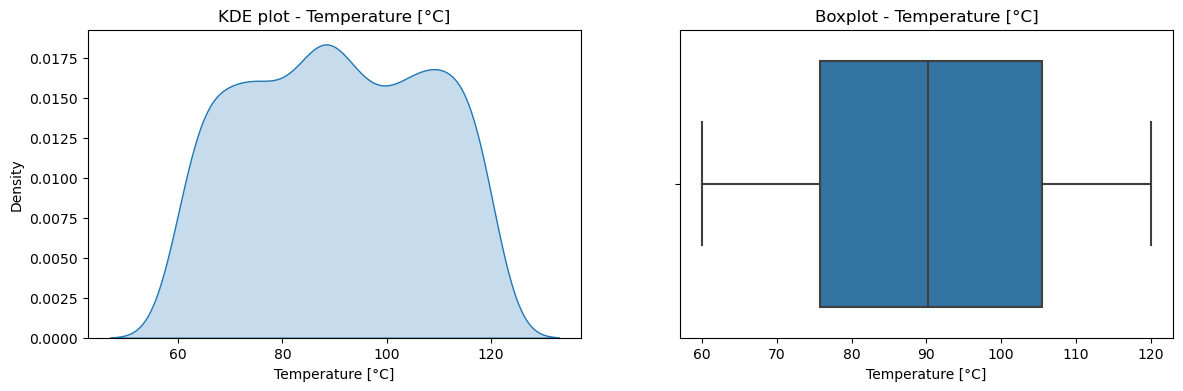

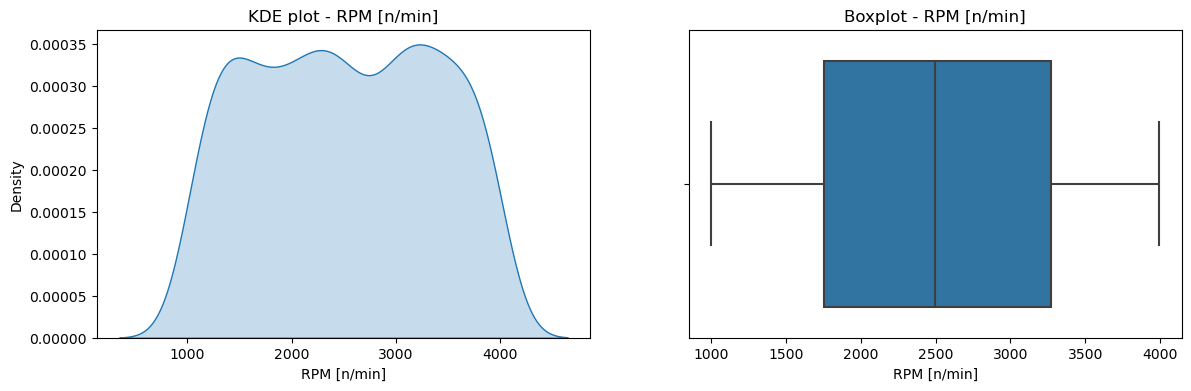

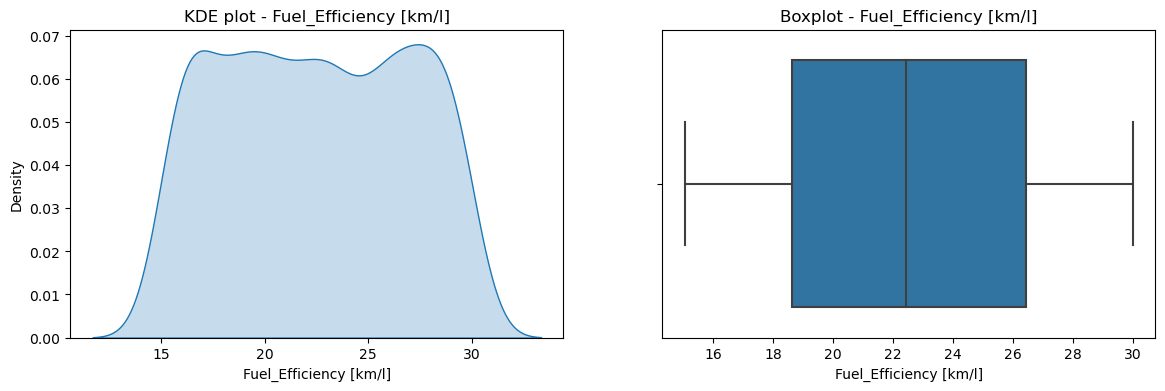

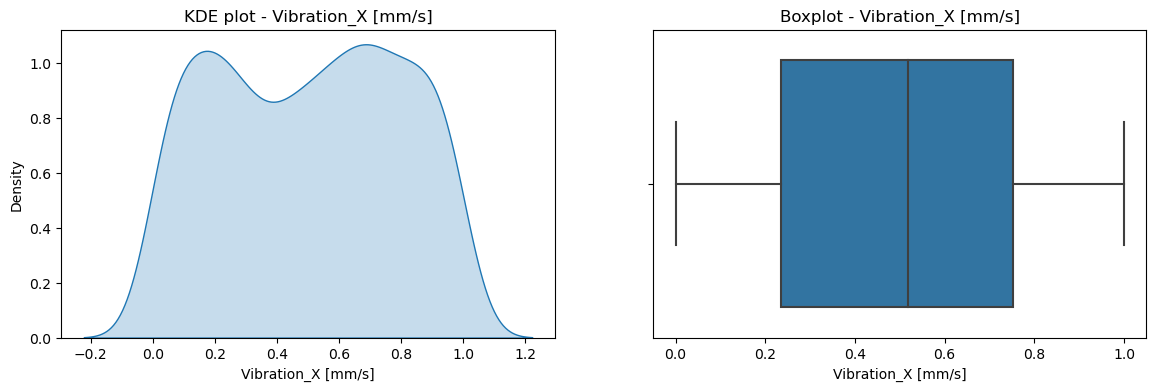

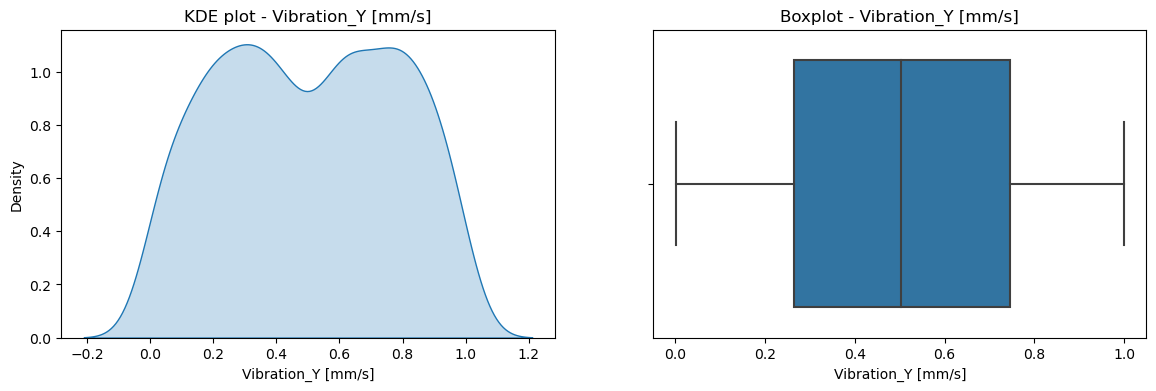

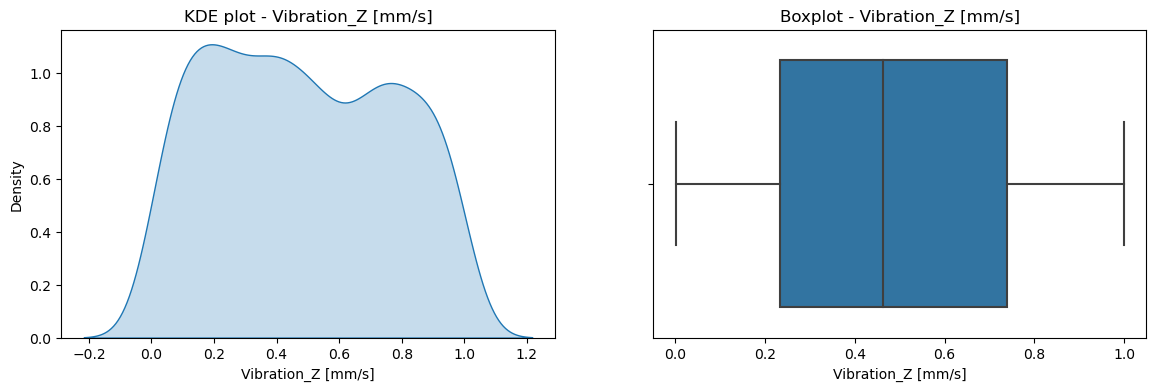

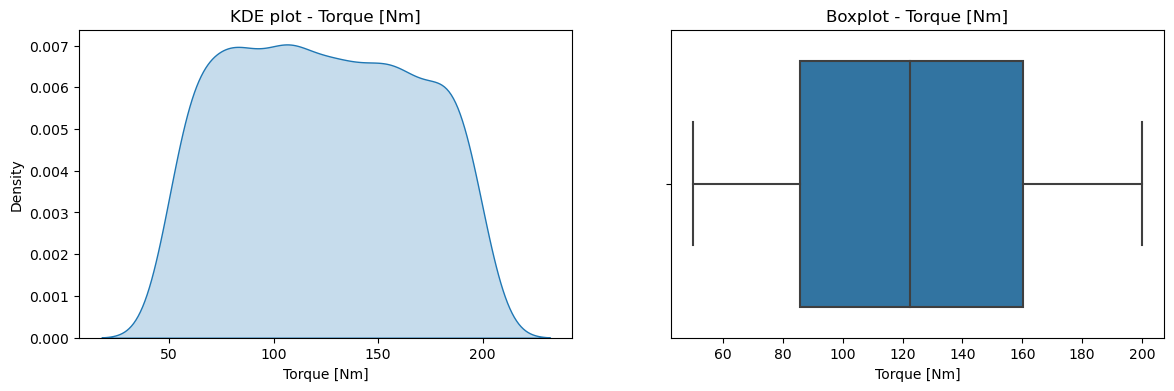

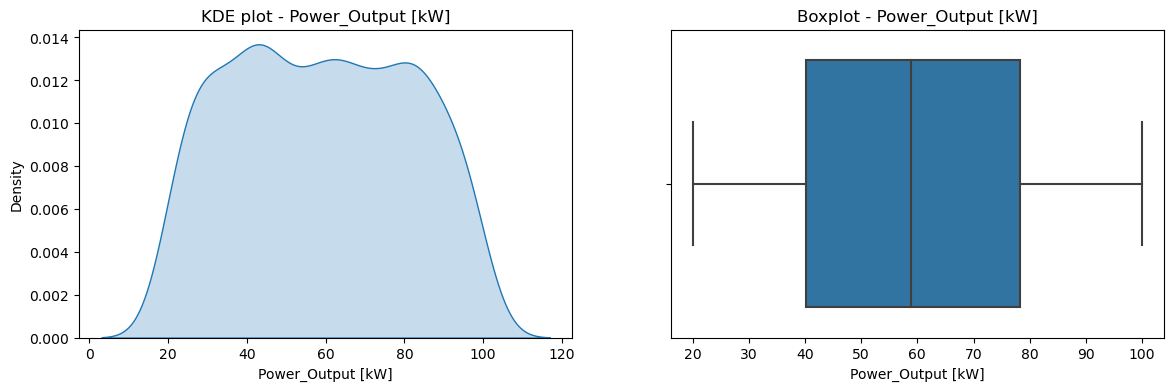

In [7]:
# Numeric features
for col in numeric_features:

    plt.figure(figsize= (14, 4)) #general dimensions for all plots

    #Kernel Density Estimation 
    plt.subplot(121)
    sns.kdeplot(data=data, x=col, fill=True)
    plt.title(f'KDE plot - {col}')

    #Boxplot
    plt.subplot(122)
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot - {col}')
    

From the boxplots above we can see how the medians for the vibrations of the x axis and the vibrations of the z axis are greatly shifted respectively to the right and to the left side of their boxplots.\
The other ones are quite centered.

### Pairplot

Pairplot with data grouped by fault conditions, in particular the darker the dots are, the higher is the probability of failure.

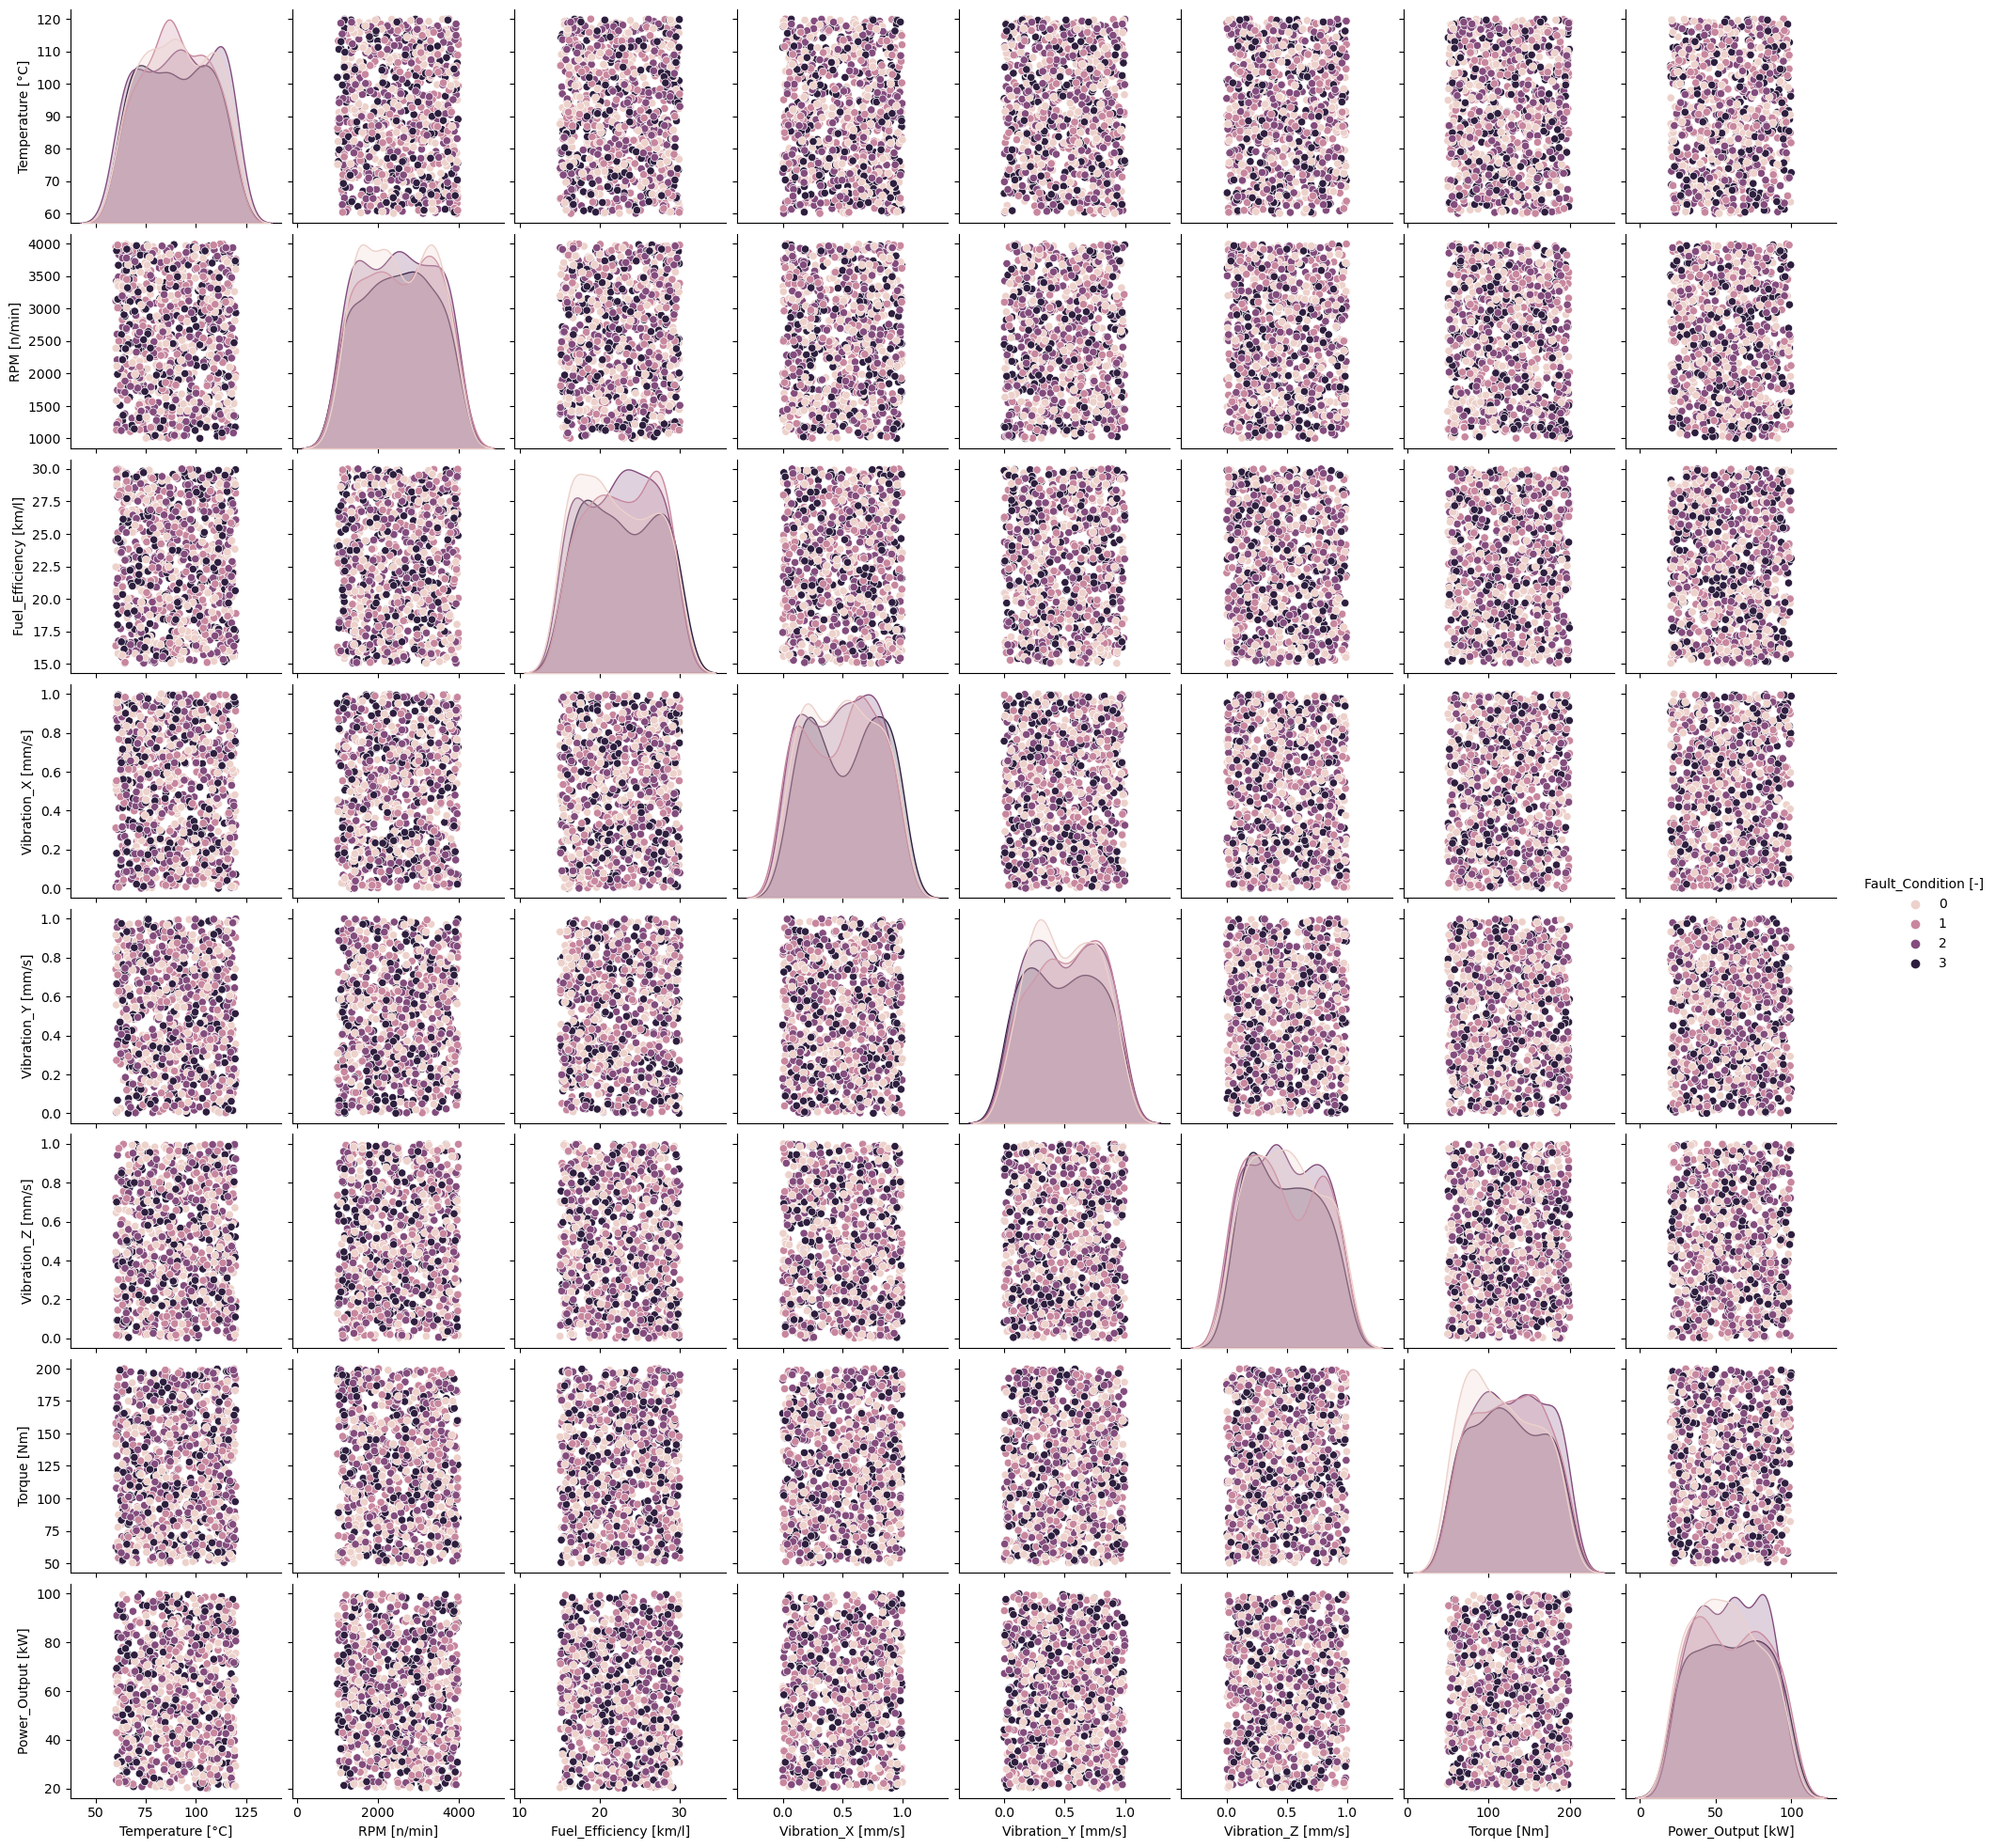

In [8]:
# Pairplot
sns.pairplot(data, 
             hue = 'Fault_Condition [-]' #differentiate data points based on fault conditions
            )

The pairplot matrix above shows the relations between pairs of variables, two at a time through scatterplots, differentiated by the *fault conditions*.\
We can see that there are not explicit connections between them at first glance.

Hence a correlation matrix could help us a bit more.

### Correlation matrix

##### Important
*If you do not want to include the Engine Failure in the correlation matrix, do not run the cell below*

In [9]:
x = data #x is a copy of our inital dataset (but without the timestamp)
numeric_features = data.select_dtypes(exclude= ['object']).columns

<AxesSubplot:>

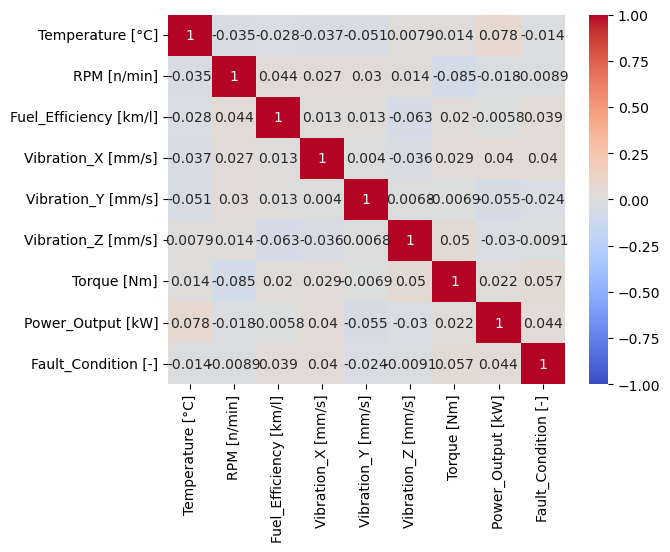

In [10]:
# Heatmap of the correlation matrix
corr_matrix= x[numeric_features].corr()
# Create heatmap with custom scale
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

The correlation matrix above, thanks to the heat map representation and to the explict numbers, can help us in a more detailed analysis.\
Specifically the numbers in the cells explain the degree of correlation between each pair of variable.\
We can point out the two highest relations which are:
- **(RPM, Torque)** with a *negative correlation*, and it make sense if we think about the physics behind the engine, in particular: $Torque=\frac{Power}{RPM}\cdot9549$
- **(Temperature, Power_Output)** with a *positive correlation*, for a combustion engine, in general the relation between power and temperature can be expressed with the following formula: $Power=(1-\frac{T_{c}}{T_{h}})\cdot\dot{Q}$, where:
    - $\dot{Q}$ energy introduced by the fuel per unit of time
    - $T_{h}$ combustion temperature
    - $T_{c}$ cool down temperature during the cycle

## Features importance

The following image shows the importance of the features for predicting the fault.

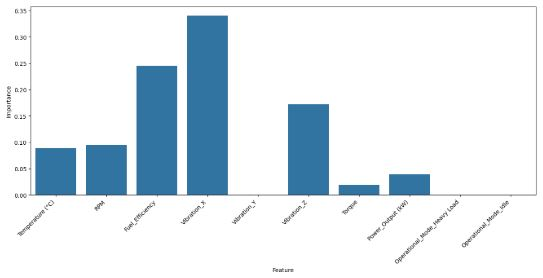

The results of the *features importance* are obtained from an online analysis of the dataset [link](https://www.kaggle.com/code/bommanaayush/ada-boost-engine-failure-detection/notebook), unsing the **AdaBoost classifier**.\
AdaBoost (short for Adaptive Boosting) is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire in 1995, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many types of learning algorithm to improve performance. The output of multiple weak learners is combined into a weighted sum that represents the final output of the boosted classifier. Usually, AdaBoost is presented for binary classification, although it can be generalized to multiple classes or bounded intervals of real values. [Wikipedia](https://en.wikipedia.org/wiki/AdaBoost)

Due to the analysis carried out and the features importance just shown, the report proceeds with a detailed analysis implemented on the three vibrational axes.\
The link: [engine-vibrations-among-xyz-axes.onrender.com](https://engine-vibrations-among-xyz-axes.onrender.com), links to a dashboard that shows the relation between **Root Mean Square** and the severity of the fault, for the three axes, furthermore an analysis of the **frequency spectrum** of the vibrations is performed through the Fast Fourier Trasform, with the **baselines** and **thresholds** added.

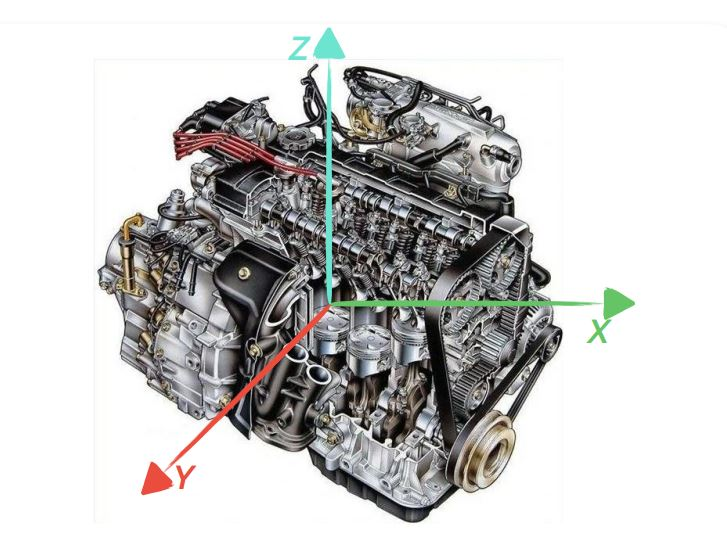